# MINISTRY OF TRADE IMPORT AND EXPORT FOR THE YEARS 2014 AND 2015

### Importing Libraries

In [700]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Retrieving Datasets

In [701]:
imp_expo = pd.read_excel("Data on TOP 100 EXPORT AND IMPORT  PRODUCTS (1).xlsx",sheet_name = ["IMPORT 2014","EXPORT 2014","IMPORT 2015","EXPORT 2015",
                                                                                              "IMPORT 2016","EXPORT 2016","IMPORT 2017","EXPORT 2017",
                                                                                              "IMPORT 2018","EXPORT 2018"])

imp_tw_14 = imp_expo.get("IMPORT 2014")    
exp_tw_14 = imp_expo.get("EXPORT 2014")
imp_tw_15 = imp_expo.get("IMPORT 2015")
exp_tw_15 = imp_expo.get("EXPORT 2015")
imp_tw_16 = imp_expo.get("IMPORT 2016")
exp_tw_16 = imp_expo.get("EXPORT 2016")
imp_tw_17 = imp_expo.get("IMPORT 2017")
exp_tw_17 = imp_expo.get("EXPORT 2017")
imp_tw_18 = imp_expo.get("IMPORT 2018")
exp_tw_18 = imp_expo.get("EXPORT 2018")

### 2014 Imports

In [702]:
# Shape
imp_tw_fourteen.shape

# Info on Dataset
imp_tw_fourteen.info()

# Checking null values
imp_tw_fourteen.isnull().sum()

# Viewing data
imp_tw_fourteen.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hs_code                  100 non-null    object 
 1   item_description         100 non-null    object 
 2   custom_value_ghs         100 non-null    float64
 3   net_weight_kgs           100 non-null    float64
 4   year                     100 non-null    object 
 5   transaction              100 non-null    object 
 6   custom_value_usd         100 non-null    float64
 7   net_weight_tons          100 non-null    float64
 8   net_weight_percent       100 non-null    float64
 9   custom_value_percentage  100 non-null    float64
 10  hs_code_head             100 non-null    object 
dtypes: float64(6), object(5)
memory usage: 8.7+ KB


,hs_code,item_description,custom_value_ghs,net_weight_kgs,year,transaction,custom_value_usd,net_weight_tons,net_weight_percent,custom_value_percentage,hs_code_head
0,2523100000,Cement clinkers,"1,646,138,258.86","3,866,159,818.31",2014,import,"514,418,205.89","3,866,159.82",49.66,7.04,25
1,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148.12","737,438.61",2014,import,"374,847,546.29",737.44,0.01,5.13,87
2,2709000000,Petroleum oils and oils obtained from bitum...,"1,149,418,088.29","3,857,276.60",2014,import,"359,193,152.59","3,857.28",0.05,4.91,27
3,8502399000,Other generating sets : Other: Other,"907,226,467.65","13,009,081.13",2014,import,"283,508,271.14","13,009.08",0.17,3.88,85
4,8708990000,"Parts and accessories, nes, for vehicles of...","721,513,001.88","3,282,918.06",2014,import,"225,472,813.09","3,282.92",0.04,3.08,87


There are no null values

In [703]:
imp_tw_fourteen = imp_tw_14.copy()    # Making a copy

# Renaming the columns
imp_tw_fourteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs'] 

# Removing unnecessary row
imp_tw_fourteen = imp_tw_fourteen.drop(0, axis = 0)
imp_tw_fourteen = imp_tw_fourteen.reset_index(drop = True)

In [704]:
# Converting columns to numeric 
imp_tw_fourteen['custom_value_ghs'] = pd.to_numeric(imp_tw_fourteen['custom_value_ghs'])
imp_tw_fourteen['net_weight_kgs'] = pd.to_numeric(imp_tw_fourteen['net_weight_kgs'])

# Formating appearance of float numbers
pd.options.display.float_format = '{:,.2f}'.format

In [705]:
# Functions 

def usd_converter(series): # Find the dollar rate per year, use a dictionary
    try:
        year = series.year[0]
        val = series.custom_value_ghs
        usdversion = val/ex_rate[year]
        return usdversion
    except:
        print('Could not process your request')

def space_stripper(series):
    series = series.str.strip(" ")
    return series

def to_ton(series):
    tonseries = series/1000
    return tonseries

def percent_calculator(series):
    prcnt = (series/series.sum())*100
    return prcnt

def hs_code_iter(table):
    j = []
    for row in table['hs_code']:
        v = row[:2]
        j.append(v)
    return j

def hs_code_header(table):
    h = pd.DataFrame(hs_code_iter(table))
    h.columns =['head']
    return h['head']

# Year Exchange Rate Dictionary
ex_rate = {
    "2014": 3.2,
    "2015": 3.7,
    "2016": 3.9,
    "2017": 4.8,
    "2018": 5.2
}

# Year Column
imp_tw_fourteen['year'] = "2014"

# Transaction Type Column
imp_tw_fourteen['transaction'] = "import"


# custom value in usd column
imp_tw_fourteen['custom_value_usd'] = usd_converter(imp_tw_fourteen)

# net weight in tonnes column
imp_tw_fourteen['net_weight_tons'] = to_ton(imp_tw_fourteen['net_weight_kgs'])

# percentage of total net weight
imp_tw_fourteen['net_weight_percent'] = percent_calculator(imp_tw_fourteen['net_weight_tons'])

# percentage of total custom value
imp_tw_fourteen['custom_value_percentage'] = percent_calculator(imp_tw_fourteen['custom_value_usd'])

# Removing white spaces from hs code
imp_tw_fourteen['hs_code'] = space_stripper(imp_tw_fourteen['hs_code'])

# Creating and Populating hs code head column
imp_tw_fourteen['hs_code_head'] = hs_code_header(imp_tw_fourteen) 


In [707]:
imp_tw_fourteen

,hs_code,item_description,custom_value_ghs,net_weight_kgs,year,transaction,custom_value_usd,net_weight_tons,net_weight_percent,custom_value_percentage,hs_code_head
0,2523100000,Cement clinkers,"1,646,138,258.86","3,866,159,818.31",2014,import,"514,418,205.89","3,866,159.82",49.66,7.04,25
1,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148.12","737,438.61",2014,import,"374,847,546.29",737.44,0.01,5.13,87
2,2709000000,Petroleum oils and oils obtained from bitum...,"1,149,418,088.29","3,857,276.60",2014,import,"359,193,152.59","3,857.28",0.05,4.91,27
3,8502399000,Other generating sets : Other: Other,"907,226,467.65","13,009,081.13",2014,import,"283,508,271.14","13,009.08",0.17,3.88,85
4,8708990000,"Parts and accessories, nes, for vehicles of...","721,513,001.88","3,282,918.06",2014,import,"225,472,813.09","3,282.92",0.04,3.08,87
...,...,...,...,...,...,...,...,...,...,...,...
95,3904100000,"Polyvinyl chloride, not mixed with other su...","71,003,613.11","22,152,806.27",2014,import,"22,188,629.10","22,152.81",0.28,0.30,39
96,8409990000,Parts for compression-ignition internal com...,"70,386,491.63","1,147,439.95",2014,import,"21,995,778.63","1,147.44",0.01,0.30,84
97,8703332050,"Other vehicles, with compression-ignition i...","70,364,764.27","2,528,818.35",2014,import,"21,988,988.83","2,528.82",0.03,0.30,87
98,7214200000,"Iron/Steel b&r, h/r, irregular coils with d...","70,099,151.94","39,949,979.61",2014,import,"21,905,984.98","39,949.98",0.51,0.30,72


### 2014 Export

In [761]:
# Observing the dataset

exp_tw_fourteen = exp_tw_14.copy()

# Shape
exp_tw_fourteen.shape

# Info
exp_tw_fourteen.info()

# null values check
exp_tw_fourteen.isnull().sum()

# First few rows in the dataset
exp_tw_fourteen.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE EXPORT FOR 2014  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


,TRADE EXPORT FOR 2014,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
1,2709000000,Petroleum oils and oils obtained from bitum...,"12,807,117,405.28","5,083,270,948.07"
2,7108131000,Gold bullion,"12,416,766,877.19","216,345.79"
3,1801001100,"Cocoa beans, superior quality raw beans","5,787,352,851.55",784958252
4,7108120000,Unwrought gold (incl. gold plated with plat...,"416,894,039.60","3,738.78"


In [710]:
# Renaming columns 
exp_tw_fourteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
exp_tw_fourteen = exp_tw_fourteen.drop(0, axis = 0)
exp_tw_fourteen = exp_tw_fourteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
exp_tw_fourteen['custom_value_ghs'] = pd.to_numeric(exp_tw_fourteen['custom_value_ghs'])
exp_tw_fourteen['net_weight_kgs'] = pd.to_numeric(exp_tw_fourteen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
exp_tw_fourteen['year'] = "2014"

# Transaction Type Column
exp_tw_fourteen['transaction'] = "export"

# Removing spaces form hs code column
exp_tw_fourteen['hs_code'] = space_stripper(exp_tw_fourteen['hs_code'])

# Creating hs code header column
exp_tw_fourteen['hs_code_head'] = hs_code_header(exp_tw_fourteen)

# Creating custom value in usd column
exp_tw_fourteen['custom_value_usd'] = usd_converter(exp_tw_fourteen)

# Creating ton column from net weight column
exp_tw_fourteen['net_weight_tons'] = to_ton(exp_tw_fourteen['net_weight_kgs'])

# Percent of total custom value
exp_tw_fourteen['custom_value_percentage'] = percent_calculator(exp_tw_fourteen['custom_value_usd'])

# percentage of total net weight
exp_tw_fourteen['net_weight_percent'] = percent_calculator(exp_tw_fourteen['net_weight_tons'])


In [711]:
exp_tw_fourteen

,hs_code,item_description,custom_value_ghs,net_weight_kgs,year,transaction,hs_code_head,custom_value_usd,net_weight_tons,custom_value_percentage,net_weight_percent
0,2709000000,Petroleum oils and oils obtained from bitum...,"12,807,117,405.28","5,083,270,948.07",2014,export,27,"4,002,224,189.15","5,083,270.95",33.96,32.50
1,7108131000,Gold bullion,"12,416,766,877.19","216,345.79",2014,export,71,"3,880,239,649.12",216.35,32.92,0.00
2,1801001100,"Cocoa beans, superior quality raw beans","5,787,352,851.55","784,958,252.00",2014,export,18,"1,808,547,766.11","784,958.25",15.34,5.02
3,7108120000,Unwrought gold (incl. gold plated with plat...,"416,894,039.60","3,738.78",2014,export,71,"130,279,387.38",3.74,1.11,0.00
4,1513290000,Palm kernel or babassu oil (excl. crude) an...,"386,065,926.24","7,285,422.63",2014,export,15,"120,645,601.95","7,285.42",1.02,0.05
...,...,...,...,...,...,...,...,...,...,...,...
95,1106209900,"Other, not Cocoyam flour","11,270,002.82","67,066.96",2014,export,11,"3,521,875.88",67.07,0.03,0.00
96,7001000000,Cullet and other waste and scrap of glass; ...,"11,163,788.26","12,086,061.39",2014,export,70,"3,488,683.83","12,086.06",0.03,0.08
97,3602009000,Other prepared explosives,"11,078,514.01","530,466.00",2014,export,36,"3,462,035.63",530.47,0.03,0.00
98,3917231000,Of polymers of vinyl chloride for water supply,"10,929,240.60","2,150,357.31",2014,export,39,"3,415,387.69","2,150.36",0.03,0.01


### 2015 Import

In [712]:
# Observing the dataset

imp_tw_fifteen = imp_tw_15.copy()
# Shape
print(imp_tw_fifteen.shape,"\n")

# Info
print(imp_tw_fifteen.info(),"\n")

# null values check
print(imp_tw_fifteen.isnull().sum(),"\n")

# First few rows in the dataset
print(imp_tw_fifteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE IMPORT FOR 2015  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 

TRADE IMPORT FOR 2015    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE IMPORT FOR 2015                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            2709000000     Petroleum oils and oils obtained from bitum...   
2            8703232050     Other vehicles, with spark-ignition interna...   
3            2523100000                                    Cement clinkers   
4            401110

In [713]:
# Renaming columns 
imp_tw_fifteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
imp_tw_fifteen = imp_tw_fifteen.drop(0, axis = 0)
imp_tw_fifteen = imp_tw_fifteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
imp_tw_fifteen['custom_value_ghs'] = pd.to_numeric(imp_tw_fifteen['custom_value_ghs'])
imp_tw_fifteen['net_weight_kgs'] = pd.to_numeric(imp_tw_fifteen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.4f}'.format

# Year Column
imp_tw_fifteen['year'] = "2015"

# Transaction Type Column
imp_tw_fifteen['transaction'] = "import"

# Removing spaces form hs code column
imp_tw_fifteen['hs_code'] = space_stripper(imp_tw_fifteen['hs_code'])

# Creating hs code header column
imp_tw_fifteen['hs_code_head'] = hs_code_header(imp_tw_fifteen)

# Creating custom value in usd column
imp_tw_fifteen['custom_value_usd'] = usd_converter(imp_tw_fifteen)

# Creating ton column from net weight column
imp_tw_fifteen['net_weight_tons'] = to_ton(imp_tw_fifteen['net_weight_kgs'])

# Percent of total custom value
imp_tw_fifteen['custom_value_percentage'] = percent_calculator(imp_tw_fifteen['custom_value_usd'])

# percentage of total net weight
imp_tw_fifteen['net_weight_percent'] = percent_calculator(imp_tw_fifteen['net_weight_tons'])


### 2015 Export

In [714]:
# Observing the dataset

exp_tw_fifteen = exp_tw_15.copy()
# Shape
print(exp_tw_fifteen.shape,"\n")

# Info
print(exp_tw_fifteen.info(),"\n")

# null values check
print(exp_tw_fifteen.isnull().sum(),"\n")

# First few rows in the dataset
print(exp_tw_fifteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE EXPORT FOR 2015  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 

TRADE EXPORT FOR 2015    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE EXPORT FOR 2015                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            7108131000                                       Gold bullion   
2            1801001100            Cocoa beans, superior quality raw beans   
3            2709000000     Petroleum oils and oils obtained from bitum...   
4            710812

In [715]:
# Renaming columns 
exp_tw_fifteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
exp_tw_fifteen = exp_tw_fifteen.drop(0, axis = 0)
exp_tw_fifteen = exp_tw_fifteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
exp_tw_fifteen['custom_value_ghs'] = pd.to_numeric(exp_tw_fifteen['custom_value_ghs'])
exp_tw_fifteen['net_weight_kgs'] = pd.to_numeric(exp_tw_fifteen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
exp_tw_fifteen['year'] = "2015"

# Transaction Type Column
exp_tw_fifteen['transaction'] = "export"

# Removing spaces form hs code column
exp_tw_fifteen['hs_code'] = space_stripper(exp_tw_fifteen['hs_code'])

# Creating hs code header column
exp_tw_fifteen['hs_code_head'] = hs_code_header(exp_tw_fifteen)

# Creating custom value in usd column
exp_tw_fifteen['custom_value_usd'] = usd_converter(exp_tw_fifteen)

# Creating ton column from net weight column
exp_tw_fifteen['net_weight_tons'] = to_ton(exp_tw_fifteen['net_weight_kgs'])

# Percent of total custom value
exp_tw_fifteen['custom_value_percentage'] = percent_calculator(exp_tw_fifteen['custom_value_usd'])

# Percentage of total net weight
exp_tw_fifteen['net_weight_percent'] = percent_calculator(exp_tw_fifteen['net_weight_tons'])


## 2016 Import

In [716]:
# Observing the dataset

imp_tw_sixteen = imp_tw_16.copy()
# Shape
print(imp_tw_sixteen.shape,"\n")

# Info
print(imp_tw_sixteen.info(),"\n")

# null values check
print(imp_tw_sixteen.isnull().sum(),"\n")

# First few rows in the dataset
print(imp_tw_sixteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE IMPORT FOR 2016  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 

TRADE IMPORT FOR 2016    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE IMPORT FOR 2016                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            8703232000     Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs   
2            1006400000                                       Rice, broken   
3            1001990000                     Wheat and meslin; Other; other   
4            252310

In [717]:
# Renaming columns 
imp_tw_sixteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
imp_tw_sixteen = imp_tw_sixteen.drop(0, axis = 0)
imp_tw_sixteen = imp_tw_sixteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
imp_tw_sixteen['custom_value_ghs'] = pd.to_numeric(imp_tw_sixteen['custom_value_ghs'])
imp_tw_sixteen['net_weight_kgs'] = pd.to_numeric(imp_tw_sixteen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
imp_tw_sixteen['year'] = "2016"

# Transaction Type Column
imp_tw_sixteen['transaction'] = "import"

# Removing spaces form hs code column
imp_tw_sixteen['hs_code'] = space_stripper(imp_tw_sixteen['hs_code'])

# Creating hs code header column
imp_tw_sixteen['hs_code_head'] = hs_code_header(imp_tw_sixteen)

# Creating custom value in usd column
imp_tw_sixteen['custom_value_usd'] = usd_converter(imp_tw_sixteen)

# Creating ton column from net weight column
imp_tw_sixteen['net_weight_tons'] = to_ton(imp_tw_sixteen['net_weight_kgs'])

# Percent of total custom value
imp_tw_sixteen['custom_value_percentage'] = percent_calculator(imp_tw_sixteen['custom_value_usd'])

# percentage of total net weight
imp_tw_sixteen['net_weight_percent'] = percent_calculator(imp_tw_sixteen['net_weight_tons'])


## 2016 Export

In [718]:
# Observing the dataset

exp_tw_sixteen = exp_tw_16.copy()
# Shape
print(exp_tw_sixteen.shape,"\n") 

# Info
print(exp_tw_sixteen.info(),"\n")

# null values check
print(exp_tw_sixteen.isnull().sum(),"\n")

# First few rows in the dataset
print(exp_tw_sixteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE EXPORT FOR 2016  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 

TRADE EXPORT FOR 2016    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE EXPORT FOR 2016                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            7108131000                                       Gold bullion   
2            1801001100            Cocoa beans, superior quality raw beans   
3            2709000000     Petroleum oils and oils obtained from bitum...   
4            080131

In [719]:
# Renaming columns 
exp_tw_sixteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
exp_tw_sixteen = exp_tw_sixteen.drop(0, axis = 0)
exp_tw_sixteen = exp_tw_sixteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
exp_tw_sixteen['custom_value_ghs'] = pd.to_numeric(exp_tw_sixteen['custom_value_ghs'])
exp_tw_sixteen['net_weight_kgs'] = pd.to_numeric(exp_tw_sixteen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
exp_tw_sixteen['year'] = "2016"

# Transaction Type Column
exp_tw_sixteen['transaction'] = "export"

# Removing spaces form hs code column
exp_tw_sixteen['hs_code'] = space_stripper(exp_tw_sixteen['hs_code'])

# Creating hs code header column
exp_tw_sixteen['hs_code_head'] = hs_code_header(exp_tw_sixteen)

# Creating custom value in usd column
exp_tw_sixteen['custom_value_usd'] = usd_converter(exp_tw_sixteen)

# Creating ton column from net weight column
exp_tw_sixteen['net_weight_tons'] = to_ton(exp_tw_sixteen['net_weight_kgs'])

# Percent of total custom value
exp_tw_sixteen['custom_value_percentage'] = percent_calculator(exp_tw_sixteen['custom_value_usd'])

# percentage of total net weight
exp_tw_sixteen['net_weight_percent'] = percent_calculator(exp_tw_sixteen['net_weight_tons'])


## 2017 Import

In [720]:
# Observing the dataset

imp_tw_seventeen = imp_tw_17.copy()
# Shape
print(imp_tw_seventeen.shape,"\n") 

# Info
print(imp_tw_seventeen.info(),"\n\n")

# null values check
print(imp_tw_seventeen.isnull().sum(),"\n")

# First few rows in the dataset
print(imp_tw_seventeen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE IMPORT FOR 2017  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 


TRADE IMPORT FOR 2017    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE IMPORT FOR 2017                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            2523100000                                    Cement clinkers   
2            8703232000     Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs   
3            1001990000                     Wheat and meslin; Other; other   
4            10064

In [721]:
# Renaming columns 
imp_tw_seventeen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
imp_tw_seventeen = imp_tw_seventeen.drop(0, axis = 0)
imp_tw_seventeen = imp_tw_seventeen.reset_index(drop = True)

# Converting Numeric Columns to numbers
imp_tw_seventeen['custom_value_ghs'] = pd.to_numeric(imp_tw_seventeen['custom_value_ghs'])
imp_tw_seventeen['net_weight_kgs'] = pd.to_numeric(imp_tw_seventeen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
imp_tw_seventeen['year'] = "2017"

# Transaction Type Column
imp_tw_seventeen['transaction'] = "import"

# Removing spaces form hs code column
imp_tw_seventeen['hs_code'] = space_stripper(imp_tw_seventeen['hs_code'])

# Creating hs code header column
imp_tw_seventeen['hs_code_head'] = hs_code_header(imp_tw_seventeen)

# Creating custom value in usd column
imp_tw_seventeen['custom_value_usd'] = usd_converter(imp_tw_seventeen)

# Creating ton column from net weight column
imp_tw_seventeen['net_weight_tons'] = to_ton(imp_tw_seventeen['net_weight_kgs'])

# Percent of total custom value
imp_tw_seventeen['custom_value_percentage'] = percent_calculator(imp_tw_seventeen['custom_value_usd'])

# percentage of total net weight
imp_tw_seventeen['net_weight_percent'] = percent_calculator(imp_tw_seventeen['net_weight_tons'])


## 2017 Export

In [722]:
# Observing the dataset

exp_tw_seventeen = exp_tw_17.copy()
# Shape
print(exp_tw_seventeen.shape,"\n") 

# Info
print(exp_tw_seventeen.info(),"\n\n")

# null values check
print(exp_tw_seventeen.isnull().sum(),"\n")

# First few rows in the dataset
print(exp_tw_seventeen.head())

(121, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE EXPORT FOR 2017  121 non-null    object
 1   Unnamed: 1             121 non-null    object
 2   Unnamed: 2             121 non-null    object
 3   Unnamed: 3             121 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB
None 


TRADE EXPORT FOR 2017    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE EXPORT FOR 2017                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            7108131000                                       Gold bullion   
2            2709000000     Petroleum oils and oils obtained from bitum...   
3            1801001100            Cocoa beans, superior quality raw beans   
4            18032

In [723]:
# Renaming columns 
exp_tw_seventeen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
exp_tw_seventeen = exp_tw_seventeen.drop(0, axis = 0)
exp_tw_seventeen = exp_tw_seventeen.reset_index(drop = True)

# Converting Numeric Columns to numbers
exp_tw_seventeen['custom_value_ghs'] = pd.to_numeric(exp_tw_seventeen['custom_value_ghs'])
exp_tw_seventeen['net_weight_kgs'] = pd.to_numeric(exp_tw_seventeen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
exp_tw_seventeen['year'] = "2017"

# Transaction Type Column
exp_tw_seventeen['transaction'] = "export"

# Removing spaces form hs code column
exp_tw_seventeen['hs_code'] = space_stripper(exp_tw_seventeen['hs_code'])

# Creating hs code header column
exp_tw_seventeen['hs_code_head'] = hs_code_header(exp_tw_seventeen)

# Creating custom value in usd column
exp_tw_seventeen['custom_value_usd'] = usd_converter(exp_tw_seventeen)

# Creating ton column from net weight column
exp_tw_seventeen['net_weight_tons'] = to_ton(exp_tw_seventeen['net_weight_kgs'])

# Percent of total custom value
exp_tw_seventeen['custom_value_percentage'] = percent_calculator(exp_tw_seventeen['custom_value_usd'])

# percentage of total net weight
exp_tw_seventeen['net_weight_percent'] = percent_calculator(exp_tw_seventeen['net_weight_tons'])


## 2018 Import

In [724]:
# Observing the dataset

imp_tw_eighteen = imp_tw_18.copy()
# Shape
print(imp_tw_eighteen.shape,"\n") 

# Info
print(imp_tw_eighteen.info(),"\n\n")

# null values check
print(imp_tw_eighteen.isnull().sum(),"\n")

# First few rows in the dataset
print(imp_tw_eighteen.head())

(102, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  102 non-null    object
 1   Unnamed: 1  101 non-null    object
 2   Unnamed: 2  101 non-null    object
 3   Unnamed: 3  101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 


Unnamed: 0    0
Unnamed: 1    1
Unnamed: 2    1
Unnamed: 3    1
dtype: int64 

              Unnamed: 0                                         Unnamed: 1  \
0  TRADE IMPORT FOR 2018                                                NaN   
1                HS CODE                                   ITEM DESCRIPTION   
2             8703232000     Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs   
3             1006400000                                       Rice, broken   
4             2523100000                                    Cement clinkers   

           Unnamed: 2       Unnamed: 3  
0 

In [725]:
imp_tw_eighteen

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,TRADE IMPORT FOR 2018,NaN,NaN,NaN
1,HS CODE,ITEM DESCRIPTION,CUSTOM VALUE (GHS),NETWEIGHT (KGs)
2,8703232000,"Used 4wd, s/i, cc > 1500 but <= 1900, <= 5 yrs","1,917,502,195.06","58,864,404.24"
3,1006400000,"Rice, broken","1,129,290,834.92","481,317,475.62"
4,2523100000,Cement clinkers,"997,017,162.30","3,687,983,426.60"
...,...,...,...,...
97,9619002100,Napkins and napkin liners for babies,"107,650,078.42","20,010,140.45"
98,2931900000,Other organo-inorganic compounds: Other,"107,444,413.41",5471764
99,8502131000,Generating sets with compression-ignition i...,"105,592,047.48","980,209.79"
100,2710115110,Diesel - Automotive Gas Oil (AGO) for TOR,"105,135,605.33",23697157


In [726]:
# Renaming columns 
imp_tw_eighteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
imp_tw_eighteen = imp_tw_eighteen.drop(0, axis = 0)
imp_tw_eighteen = imp_tw_eighteen.drop(1, axis = 0)
imp_tw_eighteen = imp_tw_eighteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
imp_tw_eighteen['custom_value_ghs'] = pd.to_numeric(imp_tw_eighteen['custom_value_ghs'])
imp_tw_eighteen['net_weight_kgs'] = pd.to_numeric(imp_tw_eighteen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
imp_tw_eighteen['year'] = "2018"

# Transaction Type Column
imp_tw_eighteen['transaction'] = "import"

# Removing spaces form hs code column
imp_tw_eighteen['hs_code'] = space_stripper(imp_tw_eighteen['hs_code'])

# Creating hs code header column
imp_tw_eighteen['hs_code_head'] = hs_code_header(imp_tw_eighteen)

# Creating custom value in usd column
imp_tw_eighteen['custom_value_usd'] = usd_converter(imp_tw_eighteen)

# Creating ton column from net weight column
imp_tw_eighteen['net_weight_tons'] = to_ton(imp_tw_eighteen['net_weight_kgs'])

# Percent of total custom value
imp_tw_eighteen['custom_value_percentage'] = percent_calculator(imp_tw_eighteen['custom_value_usd'])

# percentage of total net weight
imp_tw_eighteen['net_weight_percent'] = percent_calculator(imp_tw_eighteen['net_weight_tons'])


## 2018 Export

In [727]:
# Observing the dataset

exp_tw_eighteen = exp_tw_18.copy()
# Shape
print(exp_tw_eighteen.shape,"\n") 

# Info
print(exp_tw_eighteen.info(),"\n\n")

# null values check
print(exp_tw_eighteen.isnull().sum(),"\n")

# First few rows in the dataset
print(exp_tw_eighteen.head())

(101, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRADE EXPORT FOR 2018  101 non-null    object
 1   Unnamed: 1             101 non-null    object
 2   Unnamed: 2             101 non-null    object
 3   Unnamed: 3             101 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB
None 


TRADE EXPORT FOR 2018    0
Unnamed: 1               0
Unnamed: 2               0
Unnamed: 3               0
dtype: int64 

  TRADE EXPORT FOR 2018                                         Unnamed: 1  \
0               HS CODE                                   ITEM DESCRIPTION   
1            7108131000                                       Gold bullion   
2            2709000000     Petroleum oils and oils obtained from bitum...   
3            1801001100            Cocoa beans, superior quality raw beans   
4            71081

In [728]:
# Renaming columns 
exp_tw_eighteen.columns = ['hs_code','item_description','custom_value_ghs','net_weight_kgs']

# Removing unnecessary row
exp_tw_eighteen = exp_tw_eighteen.drop(0, axis = 0)
exp_tw_eighteen = exp_tw_eighteen.reset_index(drop = True)

# Converting Numeric Columns to numbers
exp_tw_eighteen['custom_value_ghs'] = pd.to_numeric(exp_tw_eighteen['custom_value_ghs'])
exp_tw_eighteen['net_weight_kgs'] = pd.to_numeric(exp_tw_eighteen['net_weight_kgs'])

# Setting float display format
pd.options.display.float_format = '{:,.2f}'.format

# Year Column
exp_tw_eighteen['year'] = "2018"

# Transaction Type Column
exp_tw_eighteen['transaction'] = "export"

# Removing spaces form hs code column
exp_tw_eighteen['hs_code'] = space_stripper(exp_tw_eighteen['hs_code'])

# Creating hs code header column
exp_tw_eighteen['hs_code_head'] = hs_code_header(exp_tw_eighteen)

# Creating custom value in usd column
exp_tw_eighteen['custom_value_usd'] = usd_converter(exp_tw_eighteen)

# Creating ton column from net weight column
exp_tw_eighteen['net_weight_tons'] = to_ton(exp_tw_eighteen['net_weight_kgs'])

# Percent of total custom value
exp_tw_eighteen['custom_value_percentage'] = percent_calculator(exp_tw_eighteen['custom_value_usd'])

# percentage of total net weight
exp_tw_eighteen['net_weight_percent'] = percent_calculator(exp_tw_eighteen['net_weight_tons'])


In [729]:
# sns.lineplot(x = imp_tw_fourteen['hs_code'], y = imp_tw_fourteen['custom_value_percentage'])
# plt.xticks(rotation = 60)
# plt.figure(figsize=(20,20), dpi= 300)
# plt.show()

In [730]:
tot_c_val2014 = sum(imp_tw_fourteen["custom_value_usd"]) + sum (exp_tw_fourteen["custom_value_usd"])
print(f'Total Custom Value for 2014 was {tot_c_val2014}usd')

Total Custom Value for 2014 was 19096739131.77688usd


In [731]:
tot_c_val2015 = sum(imp_tw_fifteen["custom_value_usd"])+sum(exp_tw_fifteen["custom_value_usd"])
print(f'Total Custom Value for 2015 was {sum(imp_tw_fifteen["custom_value_usd"])+sum(exp_tw_fifteen["custom_value_usd"])}usd')

Total Custom Value for 2015 was 19040311718.760002usd


In [732]:
c_val_inc = tot_c_val2015 - tot_c_val2014
print(f"There was an increase in value of {c_val_inc}usd in 2015 over 2014")

There was an increase in value of -56427413.01687622usd in 2015 over 2014


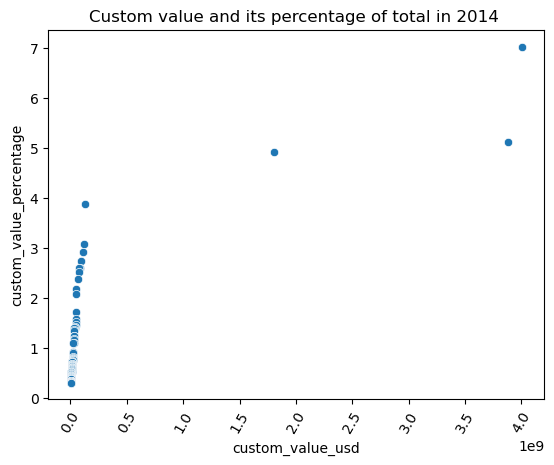

In [733]:
sns.scatterplot(y = imp_tw_fourteen['custom_value_percentage'], x = exp_tw_fourteen['custom_value_usd'])
plt.xticks(rotation = 60)
plt.title("Custom value and its percentage of total in 2014 ")
plt.show()

Most value was obtained through a lot of items with lower value than those with higher value

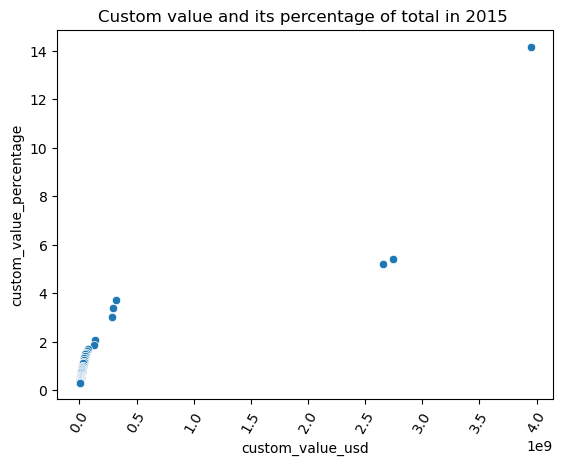

In [734]:
sns.scatterplot(y = imp_tw_fifteen['custom_value_percentage'], x = exp_tw_fifteen['custom_value_usd'])
plt.xticks(rotation = 60)
plt.title("Custom value and its percentage of total in 2015 ")
plt.show()


This year has a very large percentage for a specific value source in comparison with 2014. 
It creates a curiosity to investigate further. The difference is very large

In [735]:
!pip install benfordslaw

In [736]:
import benfordslaw

In [737]:
imp_exp = pd.concat([imp_tw_fourteen, imp_tw_fifteen, imp_tw_sixteen , imp_tw_seventeen, imp_tw_eighteen,
                     exp_tw_fourteen, exp_tw_fifteen, exp_tw_sixteen, exp_tw_seventeen, exp_tw_eighteen], axis = 0)

In [738]:
# hs_code_cat = {
#     "animals and products":["01","02","03","04","05"],
#     "vegetable products":['06',"07","08","09","10","11","12","13","14"],
#     "animal and vegetable oils, fats and waxes":["015"],
#     "prepared foodstuffs; beverages, spirits and vinegar; tobacco and substitutes":["16","17","18","19","20","21","22","23","24"],
#     "mineral products":["25","26","27"],
#     "products: chemical or allied industries":["28","29","30","31","32","33","34","35","36","37","38"],
#     "plastics and rubbers":["39"],
#     "raw hides, skins, leather":["40","41","42","43"],
#     "wood; corks; plaiting materials":["44","45","46","47","48","49"],
#     "textiles and textile articles":["50","51","52","53","54","55","56","57","58","59","60","61","62","63"],
#     "footwear; headgear; umbrellas; walking sticks; seat sticks; whips; riding-crops":["64","65","66","67"],
#     "stone, plaster, cement, asbestos, mica; ceramics; glass":["68","69","70"],
#     "pearls; precious stones, metals; imitation jewellery; coin":["71"],
#     "metals and metal articles":["72","73","74","75","76","77","78","79","80","81","82","83"],
#     "nuclear reactors, boilers, machinery; parts;":["84"],
#     "Electrical machinery; sound, television image recorders":"85",
#     "railway and parts thereof; traffic signaling equipment":"86",
#     "vehicles not railwaya nd parts and accessories":"87",
#     "aircraft, spacecraft, and parts":"88",
#     "ships, boats and floating structures":"89",
#     "optical, medical or surgical instruments; clocks and watches; musical instruments;":"90",
#     "Miscellaneous manufactured articles":["91","92","93","94","95","96","97","98"]
# }

# def cat_iter(table):
#     l = []
#     i = [range(1, 15)]
#     for key, value in hs_code_cat.items():
#         for value in hs_code_cat.items():
#             if value[i] == table['hs_code_head']:
#                 l.append(hs_code_cat.key)
#         return l
    
# def category_filler(table):
#     f = pd.DataFrame(cat_iter(table))
#     f.columns = 'category'
#     return f['category']

# imp_exp['category'] = category_filler(imp_exp)

In [739]:
conditions = [
    imp_exp['hs_code'].str.startswith(('01','02','03','04','05')),
    imp_exp['hs_code'].str.startswith(('06','07','08','09','10','11','12','13','14')),
    imp_exp['hs_code'].str.startswith('15'),
    imp_exp['hs_code'].str.startswith(('16','17','18','19','20','21','22','23','24')),
    imp_exp['hs_code'].str.startswith(('25','26','27')),
    imp_exp['hs_code'].str.startswith(('28','29','30','31','32','33','34','35','36','37','38')),
    imp_exp['hs_code'].str.startswith('39'),
    imp_exp['hs_code'].str.startswith(('40','41','42','43')),
    imp_exp['hs_code'].str.startswith(('44','45','46','47','48','49')),
    imp_exp['hs_code'].str.startswith(('50','51','52','53','54','55','56','57','58','59','60','61','62','63')),
    imp_exp['hs_code'].str.startswith(('64','65','66','67')),
    imp_exp['hs_code'].str.startswith(('68','69','70')),
    imp_exp['hs_code'].str.startswith('71'),
    imp_exp['hs_code'].str.startswith(('72','73','74','75','76','77','78','79','80','81','82','83')),
    imp_exp['hs_code'].str.startswith('84'),
    imp_exp['hs_code'].str.startswith('85'),
    imp_exp['hs_code'].str.startswith('86'),
    imp_exp['hs_code'].str.startswith('87'),
    imp_exp['hs_code'].str.startswith('88'),
    imp_exp['hs_code'].str.startswith('89'),
    imp_exp['hs_code'].str.startswith('90'),
    imp_exp['hs_code'].str.startswith(('91','92','93','94','95','96','97','98'))
]

choices = [
    "animals and products",
    "vegetable products",
    "animal and vegetable oils, fats and waxes",
    "beverages, spirits and vinegar; tobacco",
    "mineral products",
    "products: chemical or allied industries",
    "plastics and rubbers",
    "raw hides, skins, leather",
    "wood; corks; plaiting materials",
    "textiles and textile articles",
    "footwear; headgear; umbrellas; walking sticks; seat sticks; whips; riding-crops",
    "stone, plaster, cement, asbestos, mica; ceramics; glass",
    "pearls; precious stones, metals; imitation jewellery; coin",
    "metals and metal articles",
    "nuclear reactors, boilers, machinery; parts;",
    "Electrical machinery; sound, television image recorders",
    "railway and parts thereof; traffic signaling equipment",
    "vehicles not railwaya nd parts and accessories",
    "aircraft, spacecraft, and parts",
    "ships, boats and floating structures",
    "optical, medical instruments; watches; musical instruments;",
    "Miscellaneous manufactured articles"
]

imp_exp['category'] = np.select(conditions, choices, "Other")

In [740]:
imp_exp

,hs_code,item_description,custom_value_ghs,net_weight_kgs,year,transaction,custom_value_usd,net_weight_tons,net_weight_percent,custom_value_percentage,hs_code_head,category
0,2523100000,Cement clinkers,"1,646,138,258.86","3,866,159,818.31",2014,import,"514,418,205.89","3,866,159.82",49.66,7.04,25,mineral products
1,8705900010,"Other special purpose motor vehicle, nes, new","1,199,512,148.12","737,438.61",2014,import,"374,847,546.29",737.44,0.01,5.13,87,vehicles not railwaya nd parts and accessories
2,2709000000,Petroleum oils and oils obtained from bitum...,"1,149,418,088.29","3,857,276.60",2014,import,"359,193,152.59","3,857.28",0.05,4.91,27,mineral products
3,8502399000,Other generating sets : Other: Other,"907,226,467.65","13,009,081.13",2014,import,"283,508,271.14","13,009.08",0.17,3.88,85,"Electrical machinery; sound, television image ..."
4,8708990000,"Parts and accessories, nes, for vehicles of...","721,513,001.88","3,282,918.06",2014,import,"225,472,813.09","3,282.92",0.04,3.08,87,vehicles not railwaya nd parts and accessories
...,...,...,...,...,...,...,...,...,...,...,...,...
95,3921902000,"Other plates, sheets, film, foil and strip,...","16,897,266.53","73,750.00",2018,export,"3,249,474.33",73.75,0.00,0.02,39,plastics and rubbers
96,3923900000,"Articles for the packing of goods, of plast...","16,895,608.29","11,772,049.17",2018,export,"3,249,155.44","11,772.05",0.08,0.02,39,plastics and rubbers
97,2402200000,Cigarettes containing tobacco,"16,561,432.22","187,294.88",2018,export,"3,184,890.81",187.29,0.00,0.02,24,"beverages, spirits and vinegar; tobacco"
98,1806321000,Chocolate and other food preparations conta...,"16,473,273.98","1,585,854.00",2018,export,"3,167,937.30","1,585.85",0.01,0.02,18,"beverages, spirits and vinegar; tobacco"


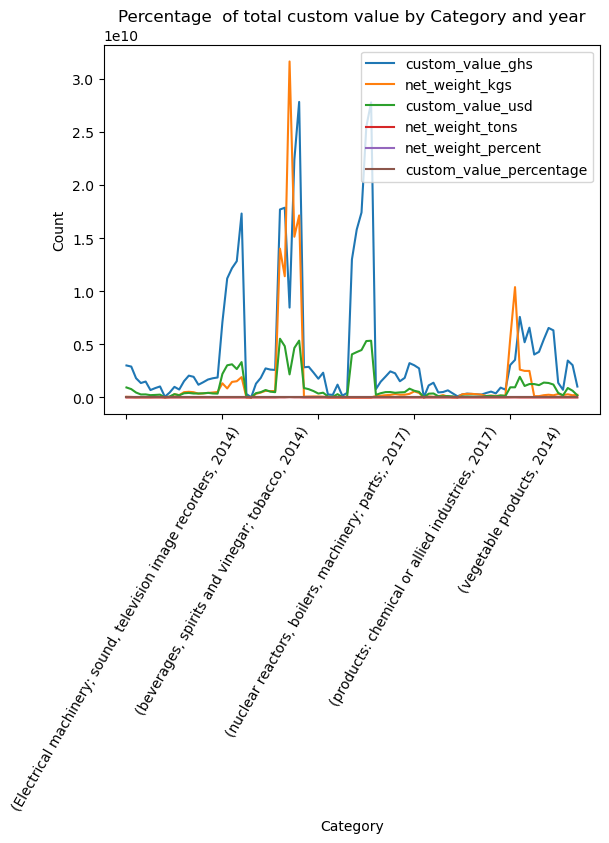

In [741]:
imp_exp.groupby(['category','year']).sum('custom_value_percentage').plot(kind = 'line')
plt.title('Percentage  of total custom value by Category and year')
plt.xlabel("Category")
plt.ylabel('Count')
plt.xticks(rotation = 60)
plt.show()

## Top Ten Categories

In [742]:
top_ten = imp_exp.groupby('category').sum('custom_value_usd').sort_values(by = 'custom_value_usd',ascending = False).head(10)

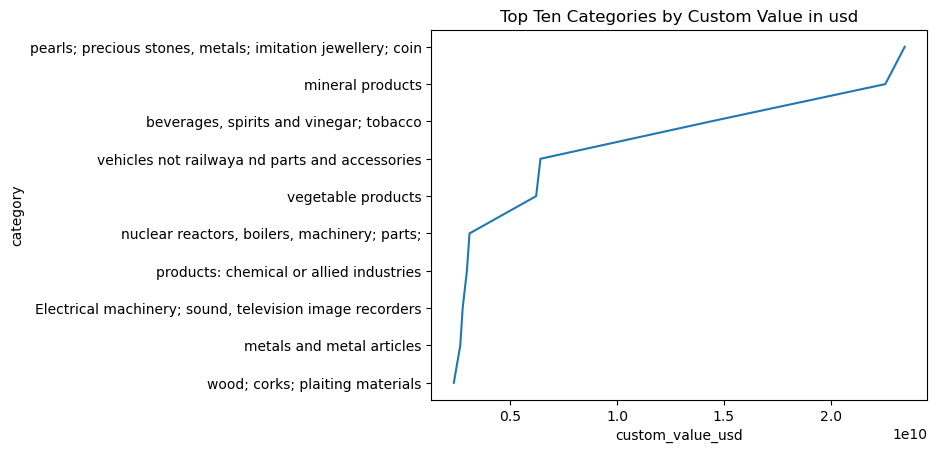

In [743]:
sns.lineplot(top_ten,
            x = 'custom_value_usd',
            y = 'category')
plt.title('Top Ten Categories by Custom Value in usd')
plt.show()

## Bottom 10 Categories

In [744]:
bot_ten = imp_exp.groupby('category')[['category','custom_value_usd']].sum('custom_value_usd').sort_values(by = 'custom_value_usd', ascending = False).tail(10)

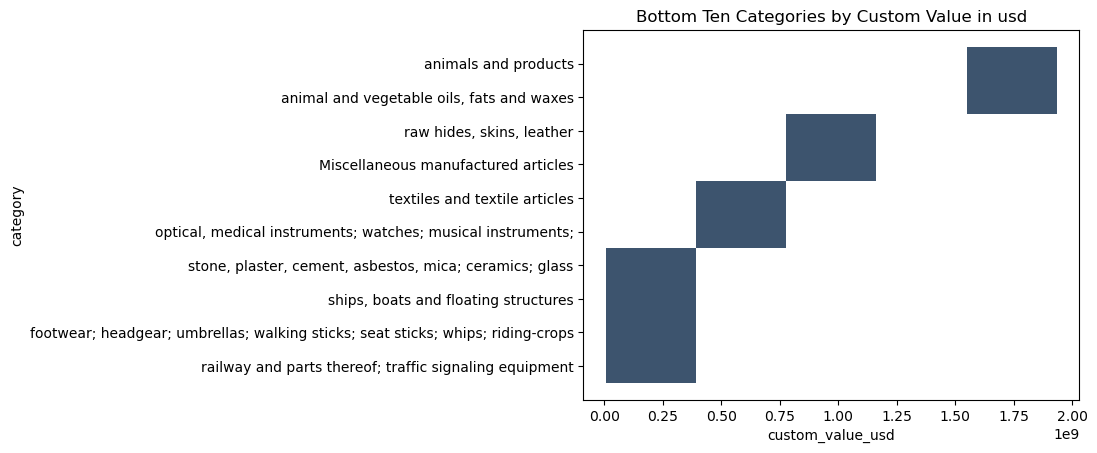

In [745]:
sns.histplot(bot_ten,
            x = 'custom_value_usd',
            y = 'category')
plt.title('Bottom Ten Categories by Custom Value in usd')
plt.show()

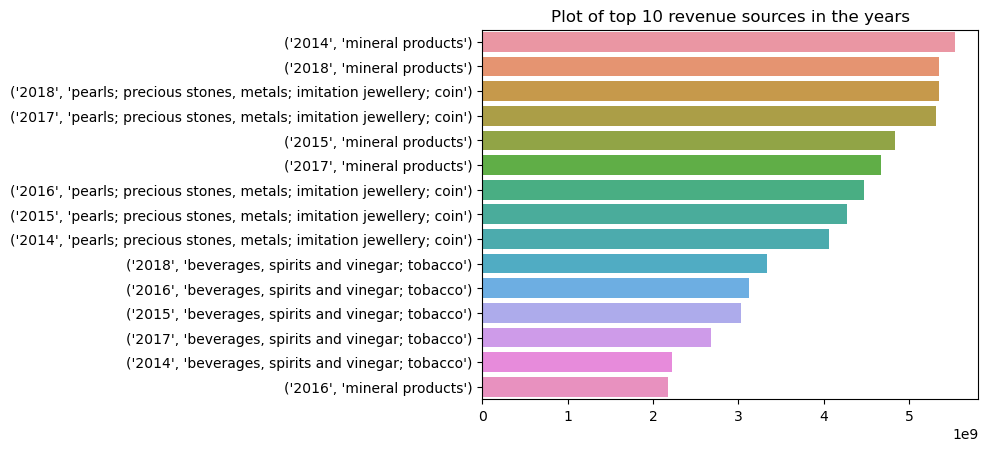

<Figure size 1000x1000 with 0 Axes>

year                         2014             2018  \
category         mineral products mineral products   
custom_value_usd 5,533,232,521.66 5,353,781,213.73   

year                                                                         \
category         pearls; precious stones, metals; imitation jewellery; coin   
custom_value_usd                                   5,345,403,587.69           

year                                                                   2017  \
category         pearls; precious stones, metals; imitation jewellery; coin   
custom_value_usd                                   5,312,882,729.07           

year                         2015             2017  \
category         mineral products mineral products   
custom_value_usd 4,830,077,162.32 4,664,361,433.22   

year                                                                   2016  \
category         pearls; precious stones, metals; imitation jewellery; coin   
custom_value_usd                                   4,468,082,069.44           

year                                                                   2015  \
category         pearls; precious stones, metals; imitation jewellery; coin   
custom_value_usd                                   4,273,682,474.65           

year                                                                   2014  \
category         pearls; precious stones, metals; imitation jewellery; coin   
custom_value_usd                                   4,062,348,684.85           

year                                                2018  \
category         beverages, spirits and vinegar; tobacco   
custom_value_usd                        3,331,756,899.92   

year                                                2016  \
category         beverages, spirits and vinegar; tobacco   
custom_value_usd                        3,122,912,908.47   

year                                                2015  \
category         beverages, spirits and vinegar; tobacco   
custom_value_usd                        3,029,489,465.94   

year                                                2017  \
category         beverages, spirits and vinegar; tobacco   
custom_value_usd                        2,675,444,087.69   

year                                                2014             2016  
category         beverages, spirits and vinegar; tobacco mineral products  
custom_value_usd                        2,218,782,489.05 2,170,619,554.47

In [753]:
cat_year = imp_exp.groupby(['year','category'])[['custom_value_usd','category']].sum('custom_value_usd').sort_values(by = 'custom_value_usd', ascending=False).head(15)
cat_year1 = cat_year.transpose()
sns.barplot(cat_year1,
            orient='horizontal')
plt.title('Plot of top 10 revenue sources in the years')
plt.figure(figsize=(10,10))
plt.show()
cat_year1

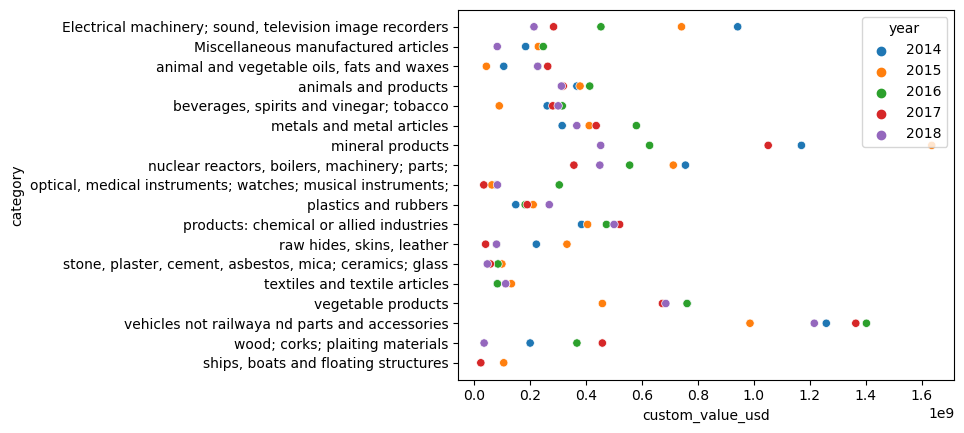

In [756]:
imports = imp_exp.query('transaction=="import"')
import1 = imports.groupby(['year','category']).sum('custom_value_usd')
sns.scatterplot(import1, y = 'category', x = 'custom_value_usd', hue = 'year')
plt.title('')
plt.show()

In [748]:
imp_2014 = import1.query('year == "2014"')

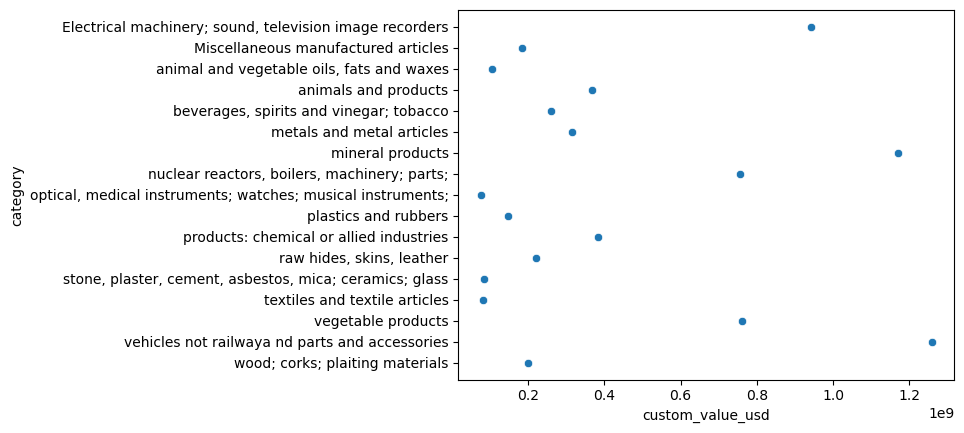

In [760]:
sns.scatterplot(imp_2014,
           x = 'custom_value_usd',
           y = 'category')
plt.show()

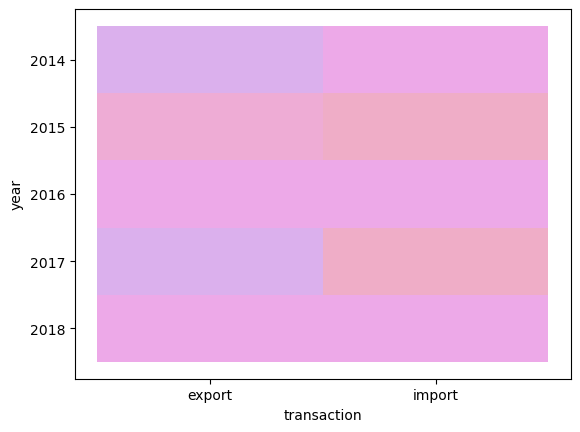

<Figure size 2000x2000 with 0 Axes>

In [750]:
year_tran = imp_exp.groupby(['year','transaction','category'])['custom_value_percentage'].sum()

sns.histplot(year_tran.transpose(),
             y = 'year',
             x = 'transaction',
            hue = 'category',
            legend=None)
plt.figure(figsize=(20,20))
plt.show()

In [751]:
!pip install pandoc
#brew install pandoc